# Data Science - Assignment 1

Dataset: <b>Census Income</b>

Thomas Bründl

se21m032

# Import necessary dependencies

In [558]:
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

# my imports 
import matplotlib.pyplot as plt
# sns.set_theme(style="ticks", color_codes=True)
import random 

%matplotlib inline

# Load raw data

In [559]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_data = pd.read_csv('./census-income.data', sep=',',
names = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year', '???'])

# Show data

In [560]:

raw_data['wage per hour'] = raw_data['wage per hour'].apply(lambda value: None if value == 0 else value)
raw_data.head(6)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,sex,member,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,???
0,73,Not in universe,0,0,High school graduate,NaN,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,NaN,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,NaN,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,NaN,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200.0,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,?,?,?,Not in universe under 1 year old,?,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.


# Univariate Analysis

## Visualizing one dimension

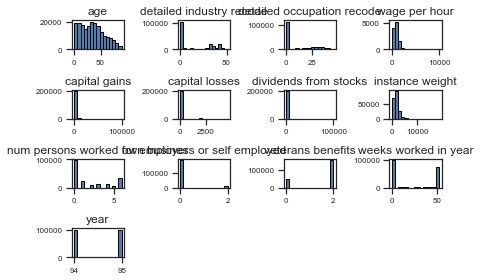

In [561]:
raw_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

### Continuous, numeric attribute in 1-D

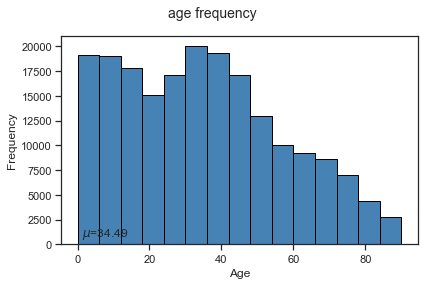

In [562]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("age frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(raw_data['age'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(raw_data['age'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

<AxesSubplot:xlabel='Age', ylabel='Density'>

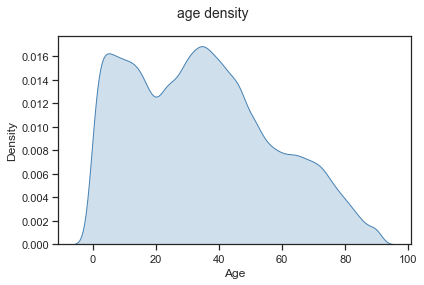

In [563]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("age density", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Density") 
sns.kdeplot(raw_data['age'], ax=ax1, shade=True, color='steelblue')

### Discrete, categorical attribute in 1-D

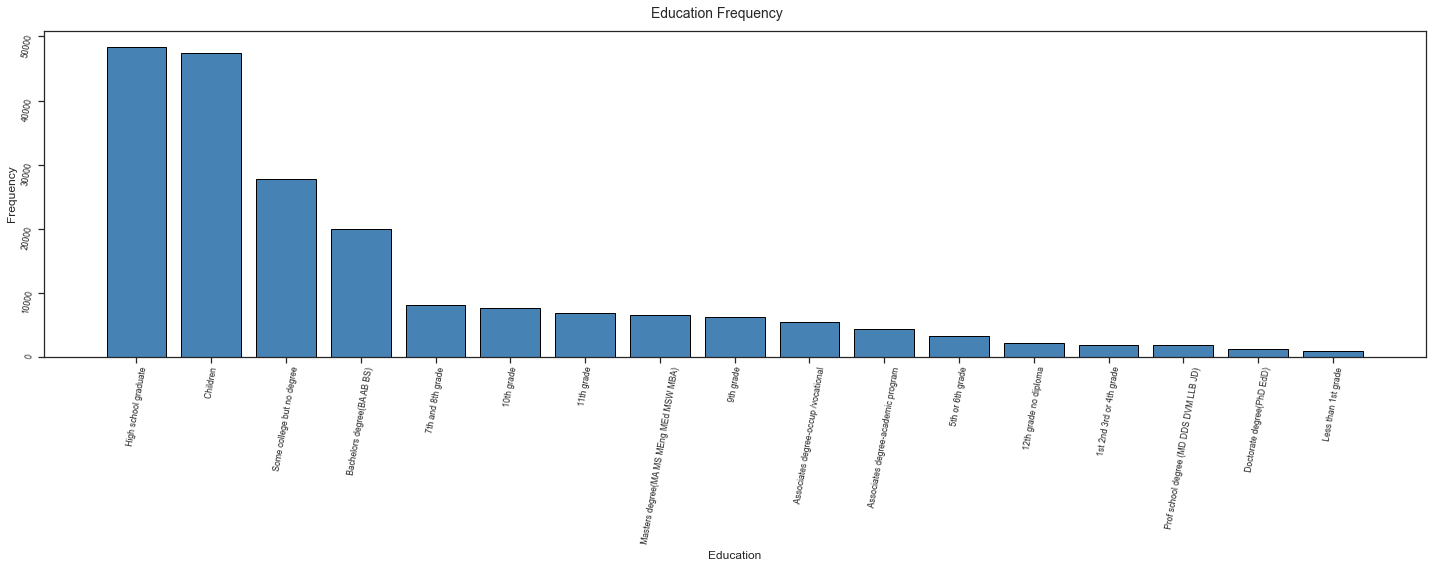

In [564]:
fig = plt.figure(figsize = (20, 8))

title = fig.suptitle("Education Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Education")
ax.set_ylabel("Frequency") 
w_q = raw_data['education'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5, rotation=80)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

# Multivariate Analysis

## Visualizing two dimensions

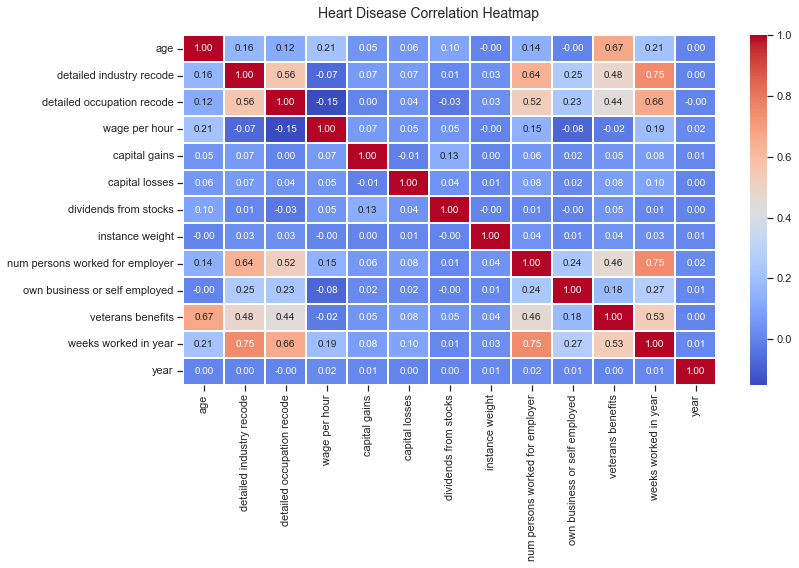

In [565]:
f, ax = plt.subplots(figsize=(12, 8))
corr = raw_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease Correlation Heatmap', fontsize=14)

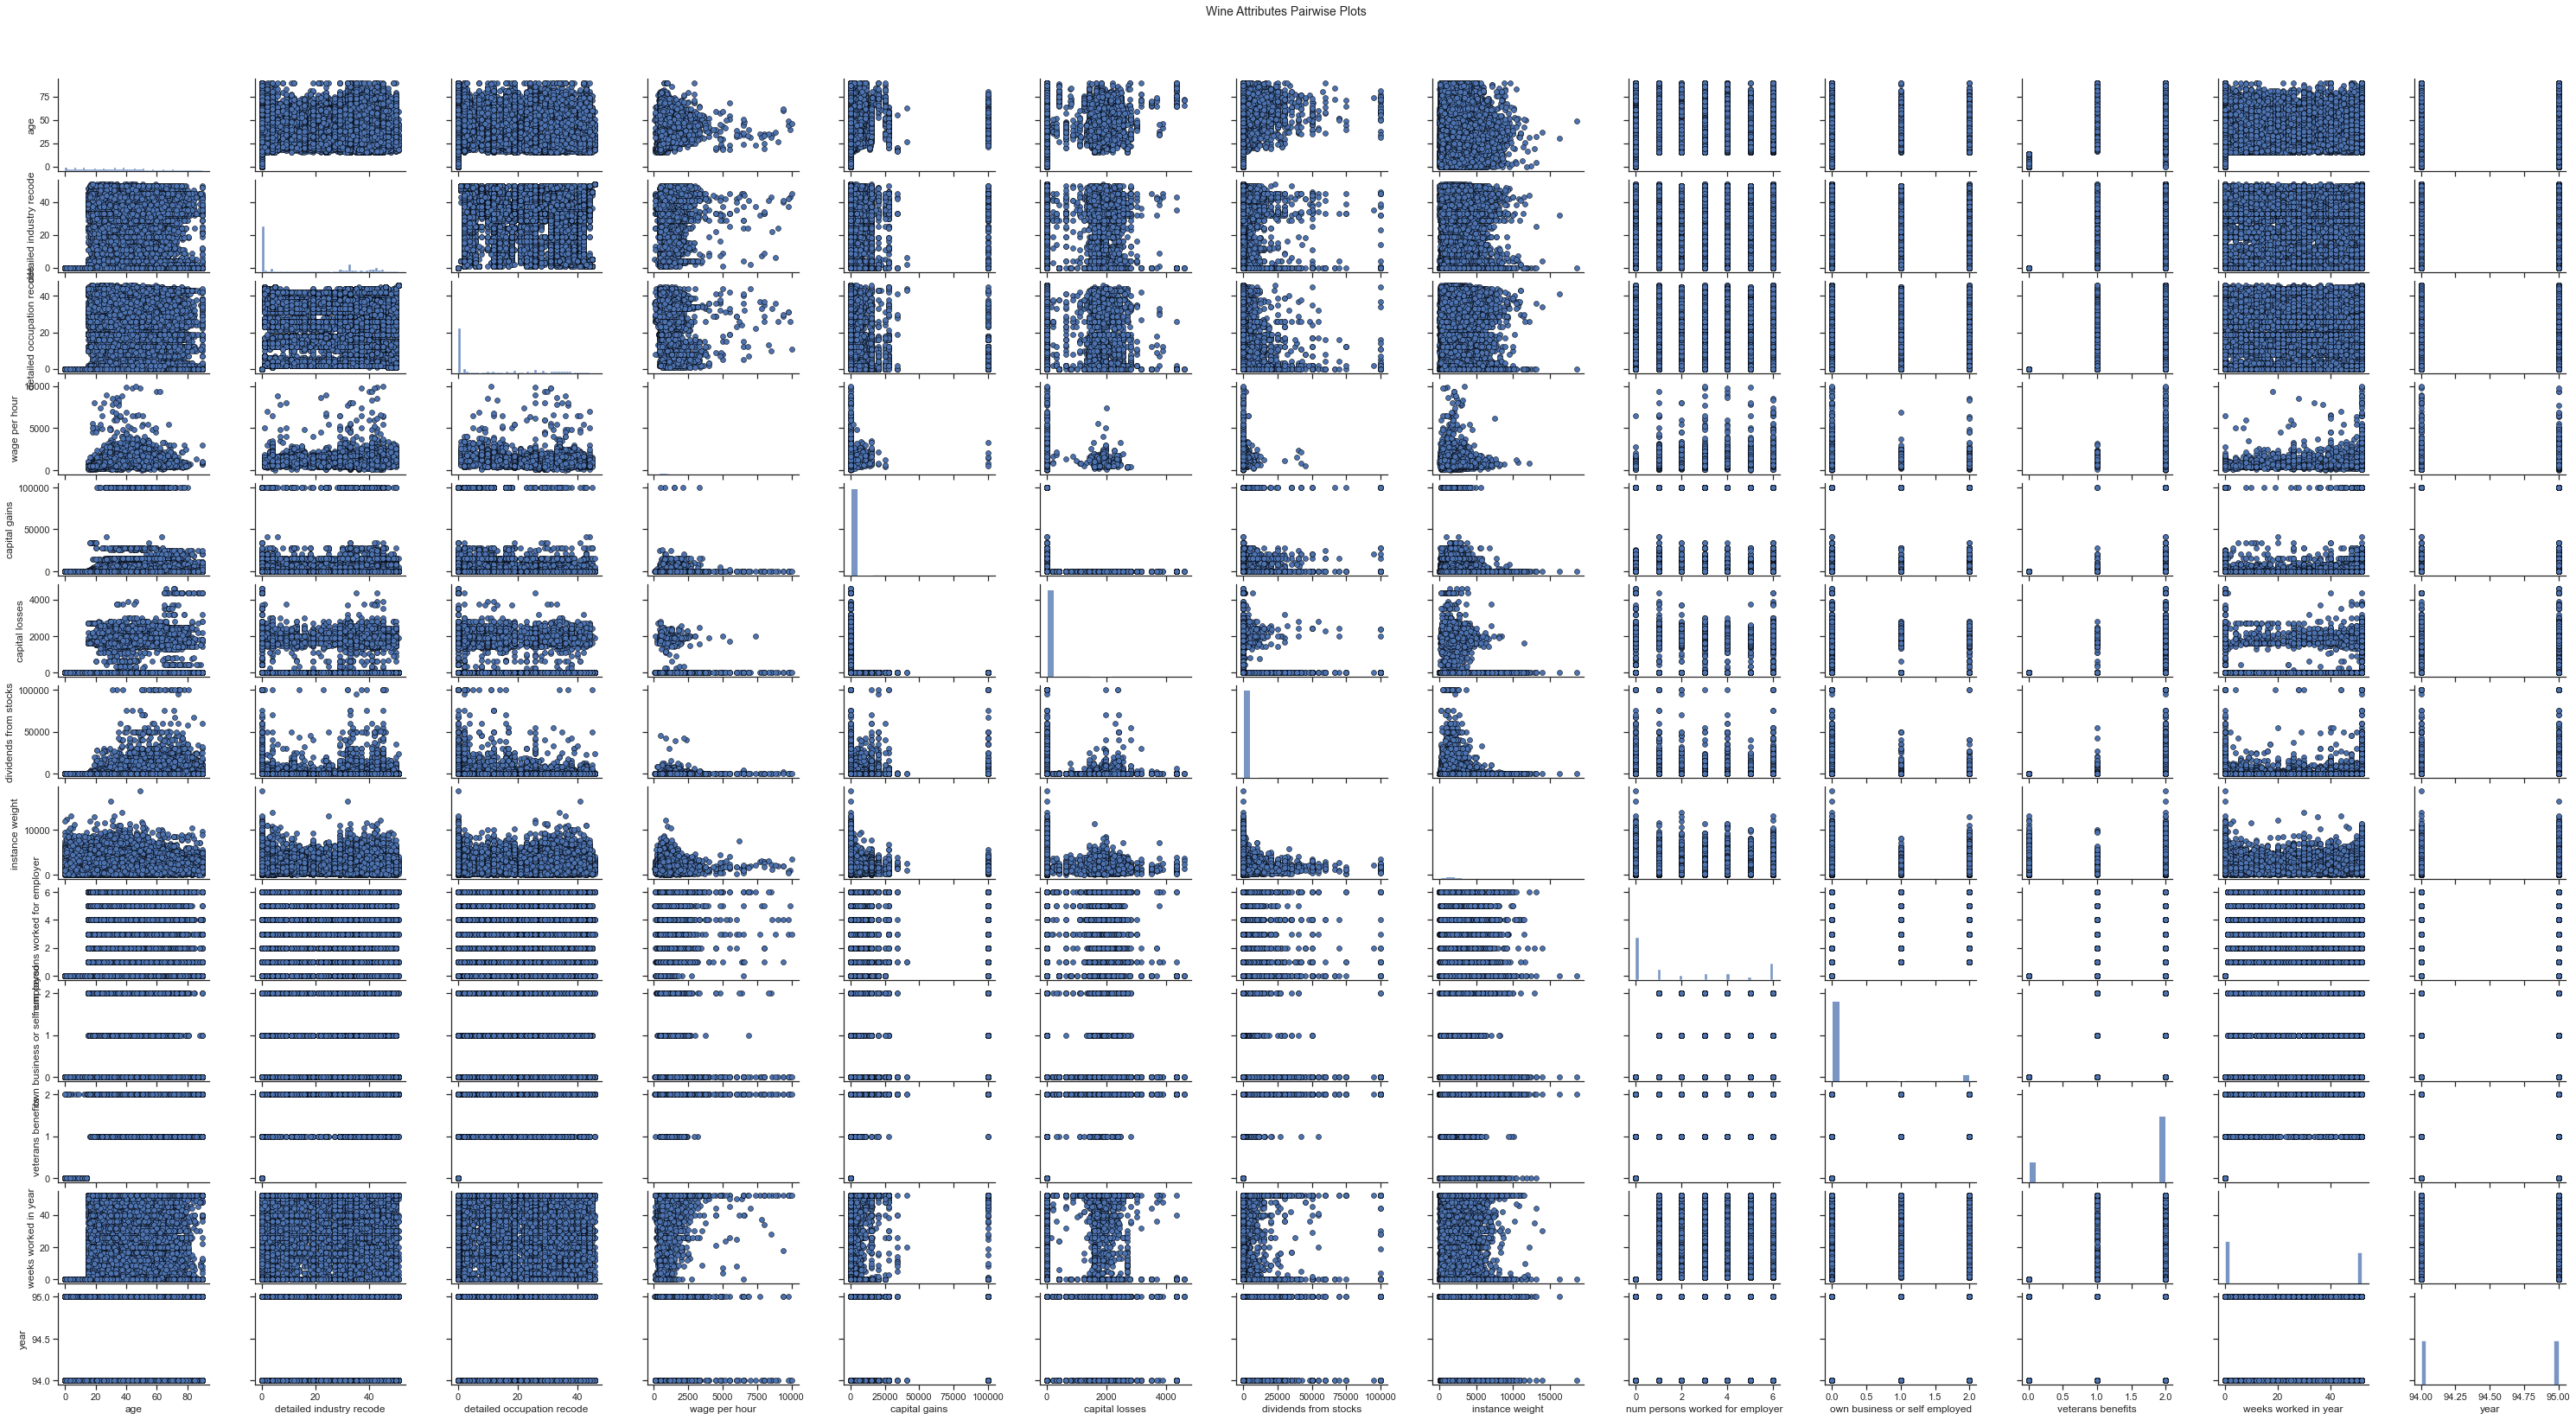

In [566]:
cols = ['age', 'class of worker', 'detailed industry recode', 'detailed occupation recode', 'education', 'wage per hour', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household',  'instance weight', 'migration code-change in msa', 'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'fill inc questionnaire for veterans admin', 'veterans benefits', 'weeks worked in year', 'year']

pp = sns.pairplot(raw_data[cols], height=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

# Analysing "wage per hour"

### "wage per hour" / "age"

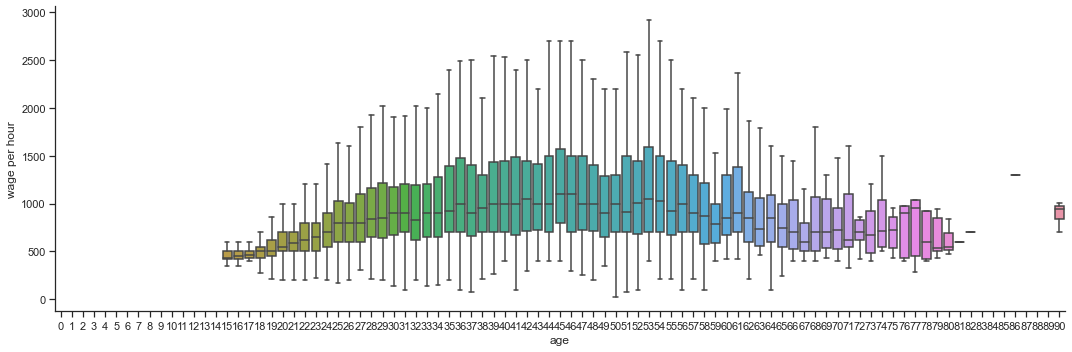

In [567]:
sns.catplot(x="age", y="wage per hour", kind="box", data=raw_data, aspect=3,  showfliers = False)

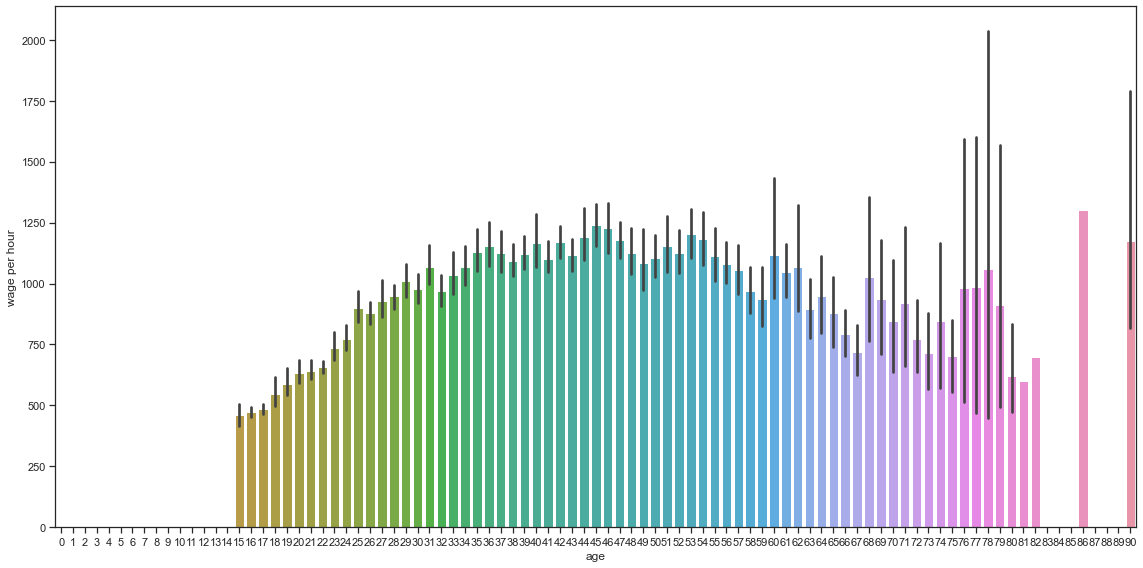

Findings:
  The wage per hour of subjects is rising from the age of 15 to 35.
  The wage per hour is stabel from the age of 35 to 55.
  The wage per hour is decreasing from the age of 55 to 75.


In [568]:
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams["figure.autolayout"] = True
bar_plot = sns.barplot(x='age', y='wage per hour', data=raw_data)
plt.show()

print("Findings:")
print("  The wage per hour of subjects is rising from the age of 15 to 35.")
print("  The wage per hour is stabel from the age of 35 to 55.")
print("  The wage per hour is decreasing from the age of 55 to 75.")

### "wage per hour" / "major industry code"

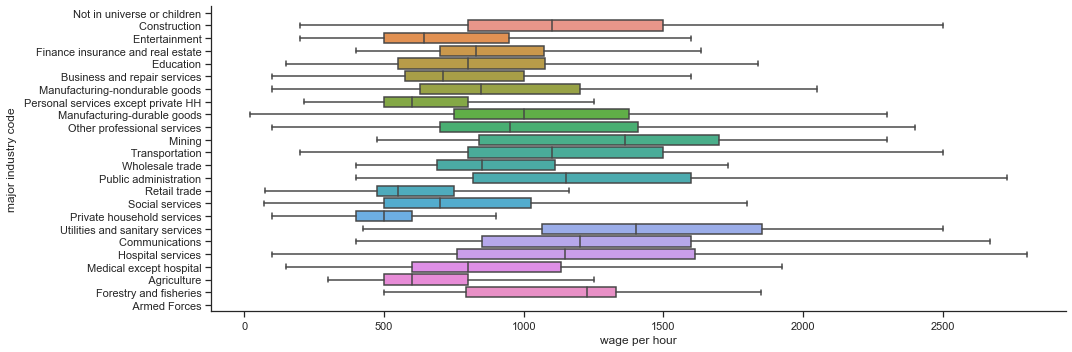

In [569]:
sns.catplot(x="wage per hour", y="major industry code", kind="box", data=raw_data, aspect=3,  showfliers = False)

### "wage per hour" / "major occupation code"

Findings:
  Subjects that operate and inspect machines earn more than subjects that work in sales.


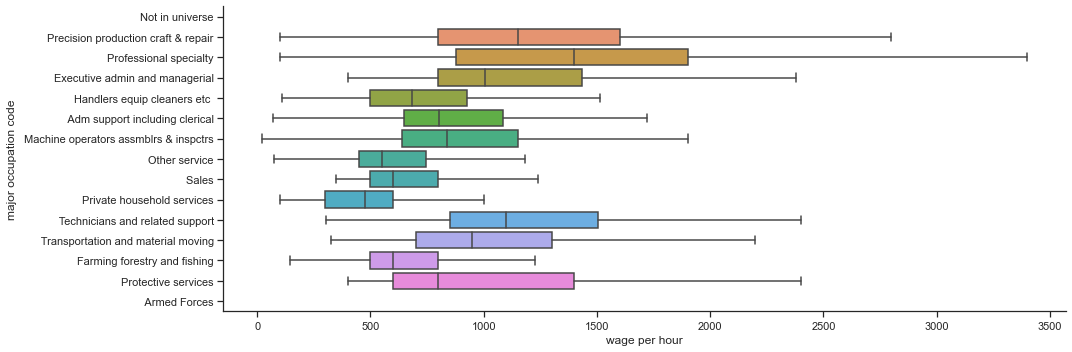

In [570]:
sns.catplot(x="wage per hour", y="major occupation code", kind="box", data=raw_data, aspect=3,  showfliers = False)

print("Findings:")
print("  Subjects that operate and inspect machines earn more than subjects that work in sales.")

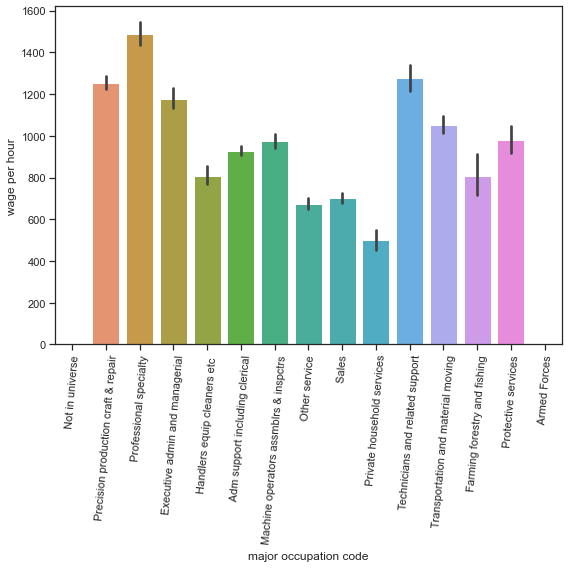

Findings:
  Subjects that work in private housholds tend to earn less than subjects that work in sales.


In [571]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True

bar_plot = sns.barplot(x='major occupation code', y='wage per hour', data=raw_data)

plt.xticks(rotation=85)
plt.show()

print("Findings:")
print("  Subjects that work in private housholds tend to earn less than subjects that work in sales.")


### "wage per hour" / "race" ... (no outliers)

Findings:
  Subjects that have a black skin color tend to earn less than subjects with a white skin color.


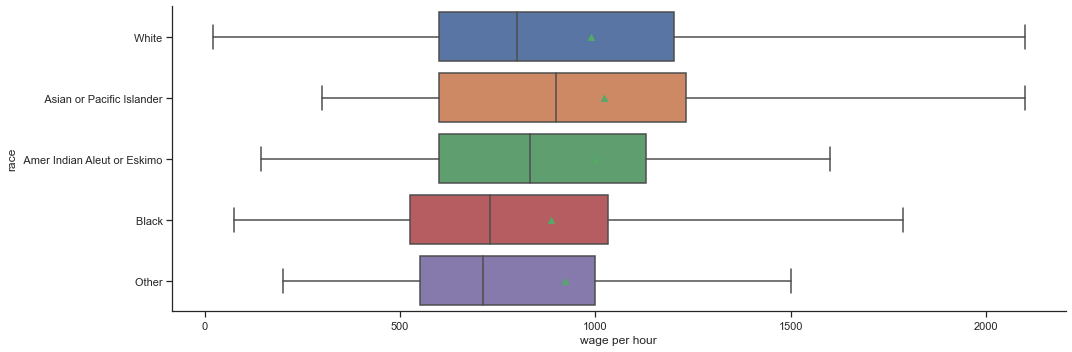

In [572]:
sns.catplot(x="wage per hour", y="race", kind="box", data=raw_data, aspect=3,  showfliers = False, showmeans=True)

print("Findings:")
print("  Subjects that have a black skin color tend to earn less than subjects with a white skin color.")

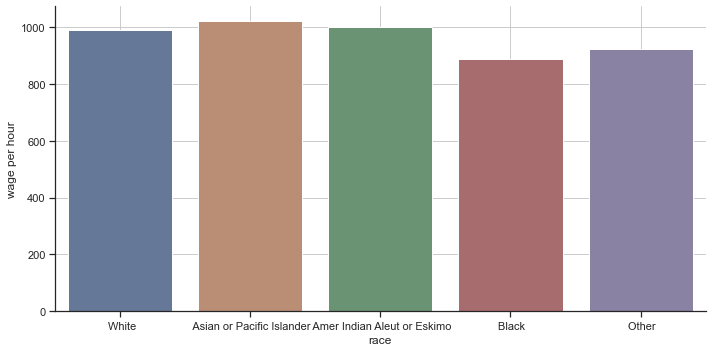

In [573]:
g = sns.catplot(x="race", y="wage per hour",
                data=raw_data, saturation=.5,
                kind="bar", ci=None, aspect=2)
plt.grid() 

### "wage per hour" / "class of worker" ... (with outliers)

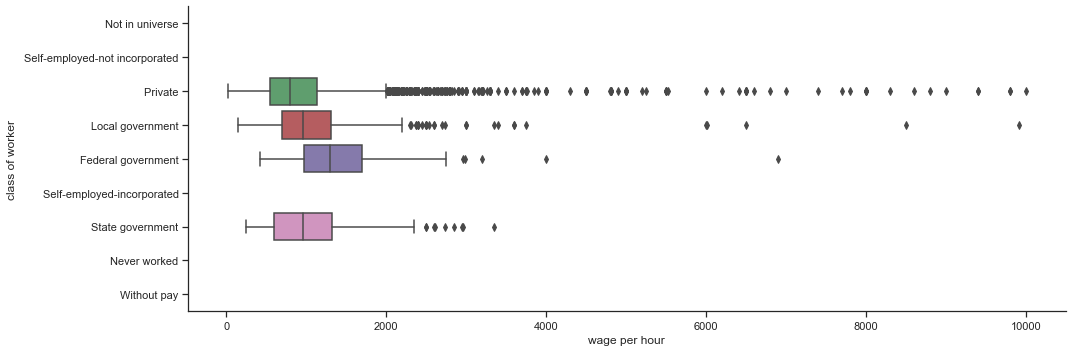

In [574]:
sns.catplot(x="wage per hour", y="class of worker", kind="box", data=raw_data,  aspect=3, showfliers = True)

### "wage per hour" / "class of worker" ... (no outliers)

Findings:
  Subjects that work for the government have a higher average salary than subjects that work in the private sector.


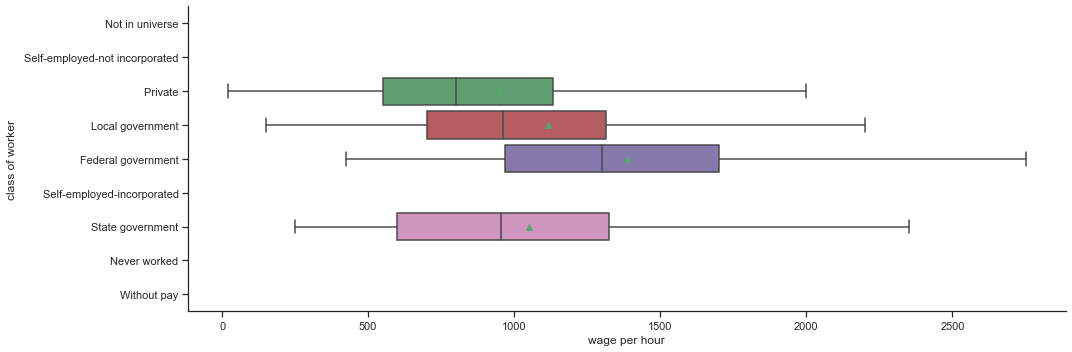

In [575]:
sns.catplot(x="wage per hour", y="class of worker", kind="box", data=raw_data,  aspect=3, showfliers = False, showmeans=True)

print("Findings:")
print("  Subjects that work for the government have a higher average salary than subjects that work in the private sector.")

### "wage per hour" / "education" ... (no outliers)

Findings:
  Subjects with a higher education tend to earn more than subjects with basic or no education.
  This can be seen by comparing subjects that only have finished 5th or 6th grade and subjects with a Phd.
  More than 75% of the subjects that have a Phd earn more than 100% of the subjects that have only finished 5th or 6th grade.
  Subjects with a Phd earn on average three times more than subjects that have only finished 5th or 6th grade.


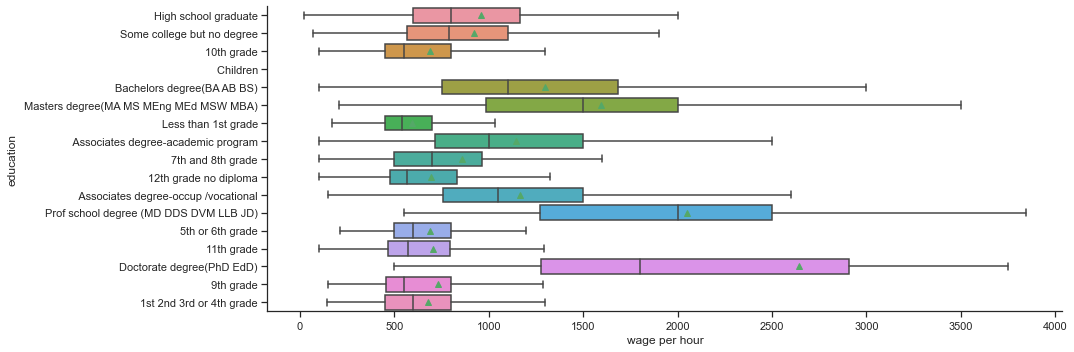

In [576]:
sns.catplot(x="wage per hour", y="education", kind="box", data=raw_data,  aspect=3, showfliers = False, showmeans=True)

print("Findings:")
print("  Subjects with a higher education tend to earn more than subjects with basic or no education.")
print("  This can be seen by comparing subjects that only have finished 5th or 6th grade and subjects with a Phd.")
print("  More than 75% of the subjects that have a Phd earn more than 100% of the subjects that have only finished 5th or 6th grade.")
print("  Subjects with a Phd earn on average three times more than subjects that have only finished 5th or 6th grade.")

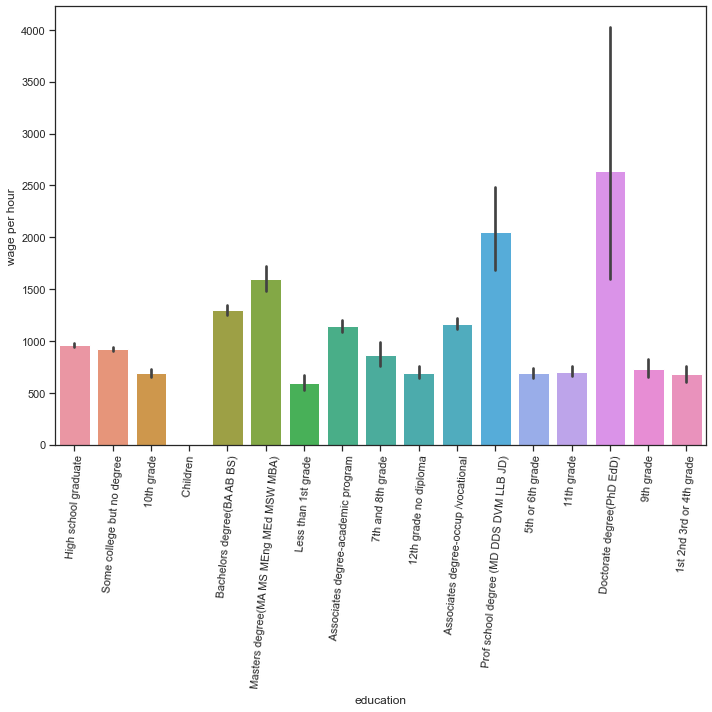

In [577]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

bar_plot = sns.barplot(x='education', y='wage per hour', data=raw_data)

plt.xticks(rotation=85)
plt.show()

### "wage per hour" / "sex"

Findings:
  Male subjects earn on average 2 USD per hour more than female subjects.


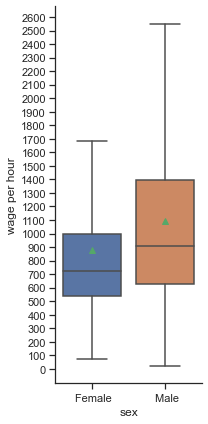

In [578]:
g = sns.catplot(x="sex", y="wage per hour", kind="box", data=raw_data, aspect=0.5, height=6, showfliers = False, showmeans=True)
myYTickInterval = []

for x in range(27):
    myYTickInterval.append(x * 100)

g.set(yticks=myYTickInterval)

print("Findings:")
print("  Male subjects earn on average 2 USD per hour more than female subjects.")

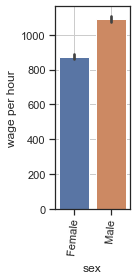

In [579]:
plt.rcParams["figure.figsize"] = [2, 4]
plt.rcParams["figure.autolayout"] = True

bar_plot = sns.barplot(x='sex', y='wage per hour', data=raw_data)

plt.xticks(rotation=85)
plt.grid()
plt.show()

### "wage per hour" / "veterans benefits" ... (not outliers)

Findings:
  Subjects that receive veteran benefits of level 1 tend to earn 2 USD more per hour than subjects that receive veteran benefits of level 2.
  It can be assumed that subjects that receive more veteran benefits are less capable to fulfill their work any more.


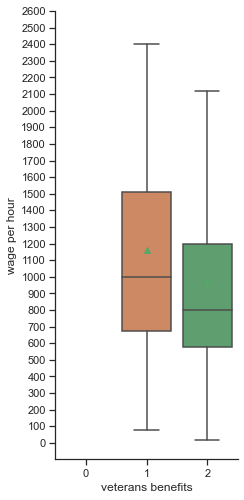

In [580]:
g = sns.catplot(x="veterans benefits", y="wage per hour", kind="box", data=raw_data, aspect=0.5, height=7, showfliers = False, showmeans=True)
myYTickInterval = []

for x in range(27):
    myYTickInterval.append(x * 100)

g.set(yticks=myYTickInterval)

print("Findings:")
print("  Subjects that receive veteran benefits of level 1 tend to earn 2 USD more per hour than subjects that receive veteran benefits of level 2.")
print("  It can be assumed that subjects that receive more veteran benefits are less capable to fulfill their work any more.")

### "wage per hour" / "citizenship"

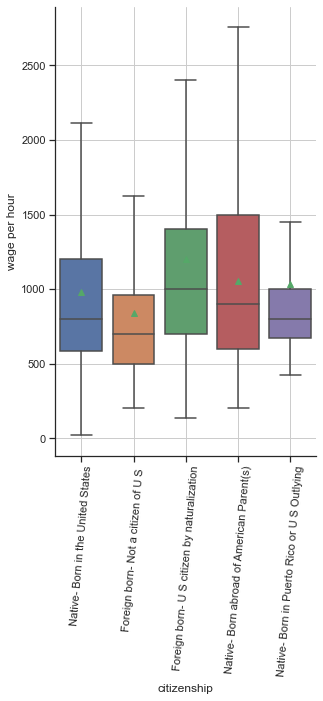

Findings:
  Native born citizens tend to earn less on average than foreigen born citizens.


In [581]:
bar_plot = sns.catplot(x="citizenship", y="wage per hour", kind="box", data=raw_data, aspect=0.8, height=7, showfliers = False, showmeans=True)
plt.xticks(rotation=85)
plt.grid()
plt.show()

print("Findings:")
print("  Native born citizens tend to earn less on average than foreigen born citizens.")


### "wage per hour" / "country of birth self"

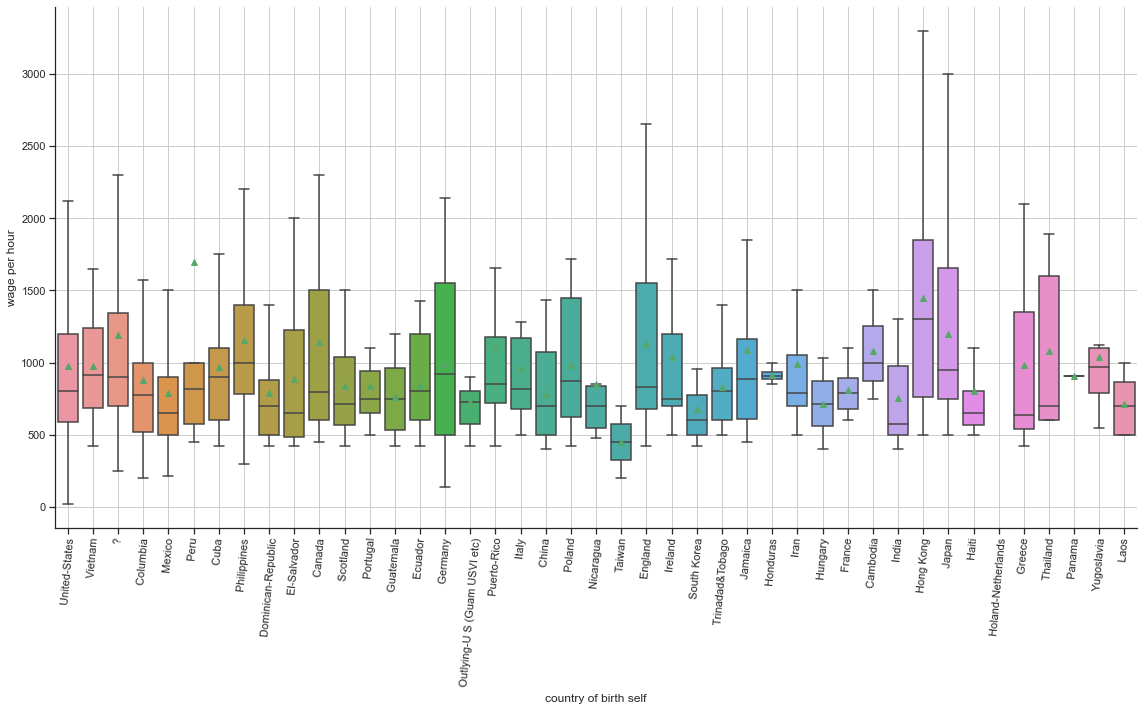

In [582]:
bar_plot = sns.catplot(x="country of birth self", y="wage per hour", kind="box", data=raw_data, aspect=2, height=8, showfliers = False, showmeans=True)
plt.xticks(rotation=85)
plt.grid()
plt.show()

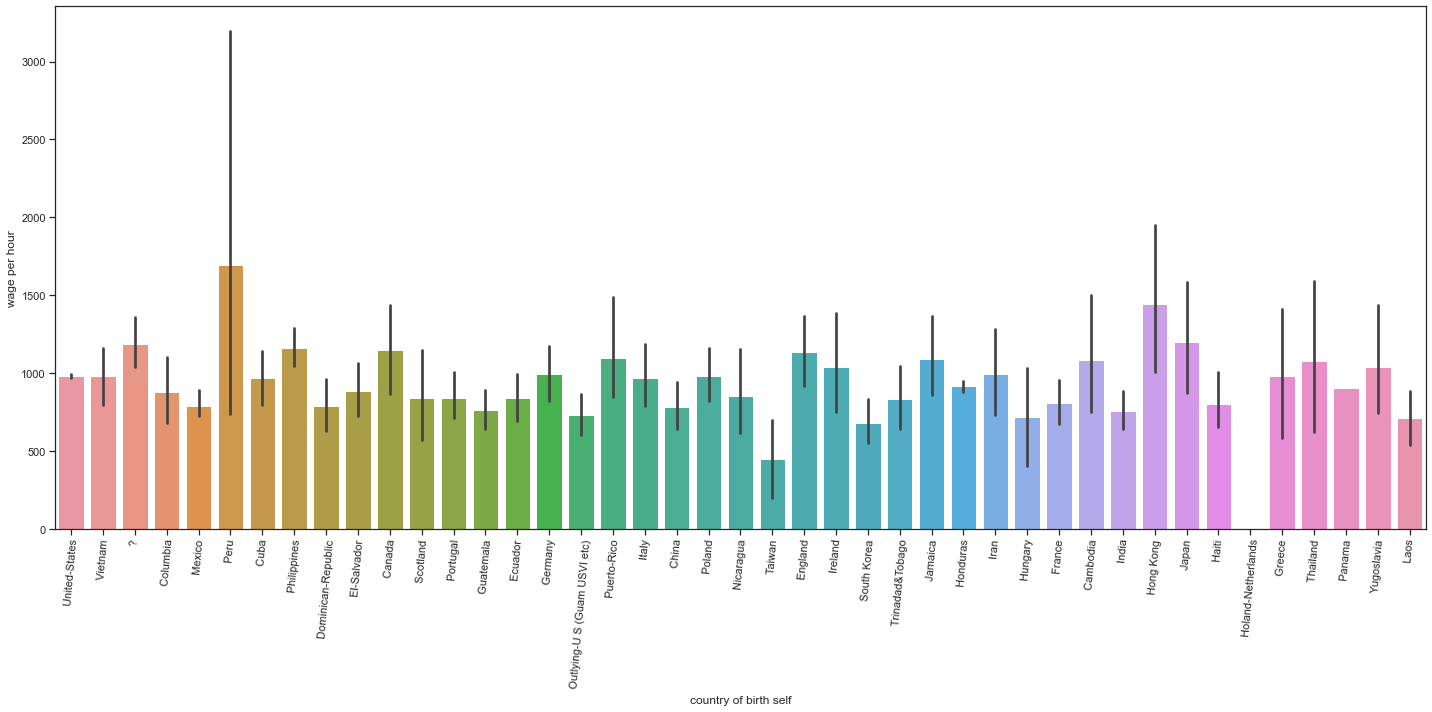

In [583]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

bar_plot = sns.barplot(x='country of birth self', y='wage per hour', data=raw_data)

plt.xticks(rotation=85)
plt.show()

### "wage per hour" / "region of previous residence"

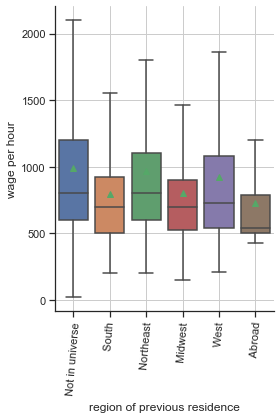

Findings:
  Subjects from the Northeast tend to earn more on average than subjects from the South.


In [584]:
bar_plot = sns.catplot(x="region of previous residence", y="wage per hour", kind="box", data=raw_data, aspect=0.8, height=5, showfliers = False, showmeans=True)
plt.xticks(rotation=85)
plt.grid()
plt.show()

print("Findings:")
print("  Subjects from the Northeast tend to earn more on average than subjects from the South.")

### "wage per hour" / "state of previous residence"

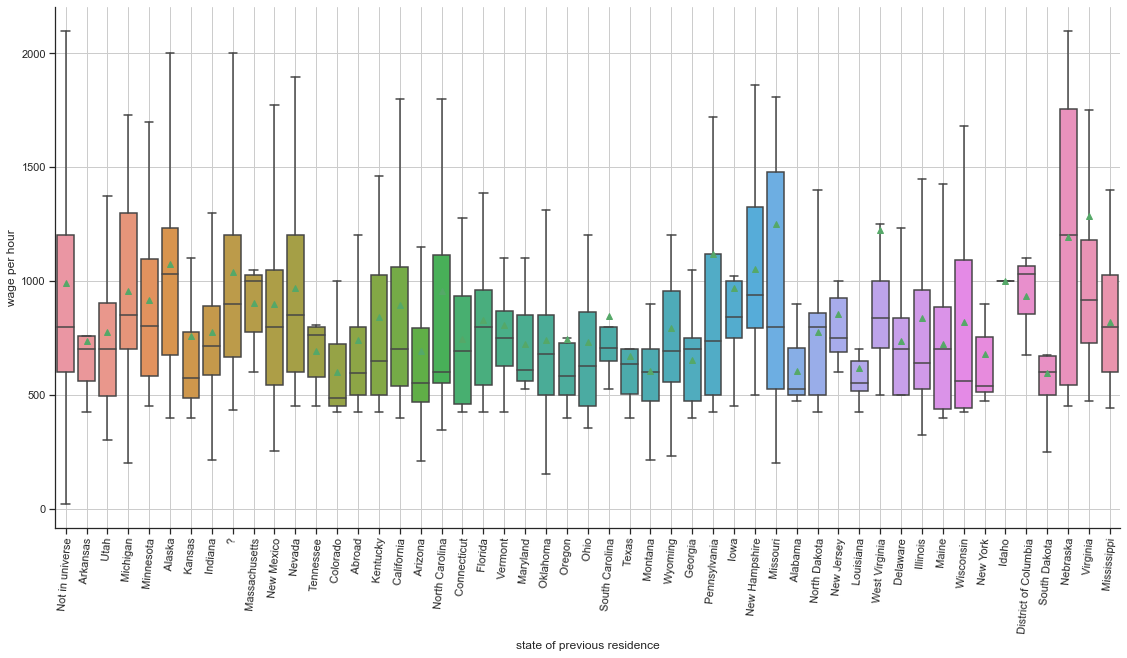

In [585]:
bar_plot = sns.catplot(x="state of previous residence", y="wage per hour", kind="box", data=raw_data, aspect=2, height=8, showfliers = False, showmeans=True)
plt.xticks(rotation=85)
plt.grid()
plt.show()


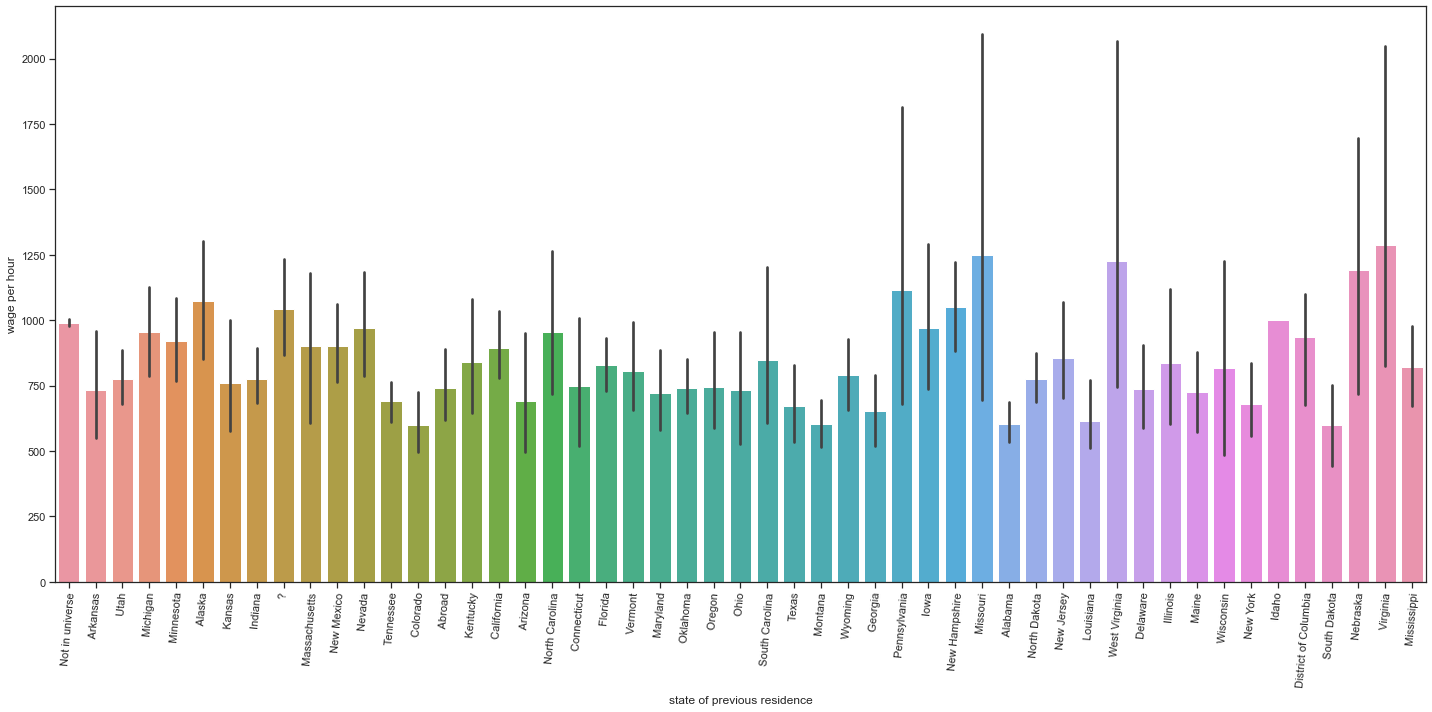

In [586]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

bar_plot = sns.barplot(x='state of previous residence', y='wage per hour', data=raw_data)

plt.xticks(rotation=85)
plt.show()

# Two Continuous Numeric attributes 

### "wage per hour" / "age"

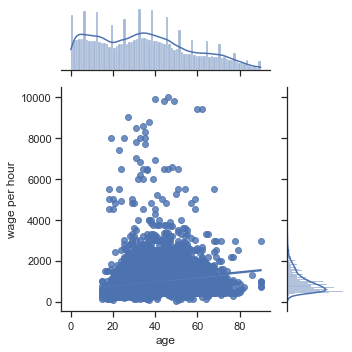

In [587]:
jp = sns.jointplot(x='age', y='wage per hour', data=raw_data,
              kind='reg', space=0, height=5, ratio=3)

### "wage per hour" / "weeks worked in year"

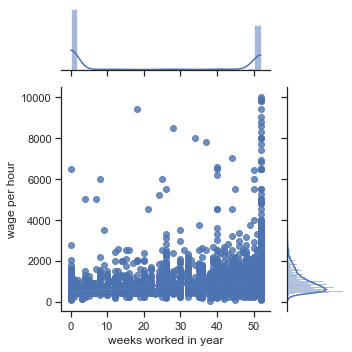

In [588]:
jp = sns.jointplot(x='weeks worked in year', y='wage per hour', data=raw_data,
              kind='reg', space=0, height=5, ratio=3)

# Three Continuous Numeric attributes

### "wage per hour" / "weeks worked in year" / "age"

Text(0.5, 0, 'wage per hour')

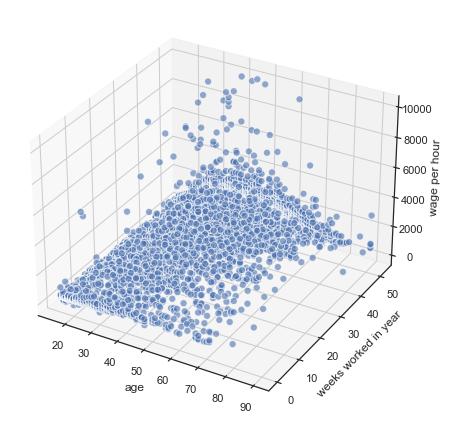

In [589]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = raw_data['age']
ys = raw_data['weeks worked in year']
zs = raw_data['wage per hour']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('age')
ax.set_ylabel('weeks worked in year')
ax.set_zlabel('wage per hour')